In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('c:/aepython/2.data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# 타이타닉 데이터프레임의 정보를 확인하라
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# 타이타닉 데이터프레임의 결측치를 확인하라
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# "Age"열의 결측치를 평균값으로 대체하고, 영구히 반영하라

In [3]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# "Cabin"열의 결측치를 N으로 변경하고 영구히 반영하라

In [7]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')

In [ ]:
#Embarked의 결측치를 N으로 변경하고 영구히 반영하라

In [8]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N')

In [ ]:
#타이타닉의 성별, 선실, 출발항구열의 고유값들을 확인하고 빈도수를 각각 확인하라

In [9]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [5]:
#Cabin 열을 데이터를 첫번째 알파벳으로 모두 변경하라
# 예) C22 ->  C

In [11]:
titanic_df['Cabin'] = titanic_df['Cabin'].apply(lambda x: x[0])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [12]:
#Cabin 열을 데이터를 첫번째 알파벳으로 모두 변경하라
# 예) C22 ->  C
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [28]:
titanic_df['Cabin'][1][0]

'C'

#### 데이터 탐색

##### 어떤 유형의 승객이 생존확률이 높았는지 확인

In [ ]:
# 성별 생존여부
#  타이타닉 승객의 성별 생존율을 계산하라

In [18]:
df1 = titanic_df.groupby(['Sex','Survived'])['Survived'].count()
df1
female_ratio = round((233)/(81+233)*100,2)
male_ratio = round((109)/(109+468)*100,2)
print('female_ratio:',female_ratio)
print('male_ratio:', male_ratio)

female_ratio: 74.2
male_ratio: 18.89


In [ ]:
# 위에서 계산한 성별 생존율을 시각화 하라

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

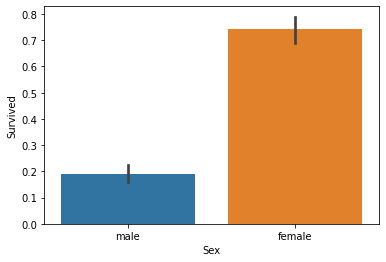

In [20]:

sns.barplot(x='Sex', y='Survived', data=titanic_df)

In [21]:
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

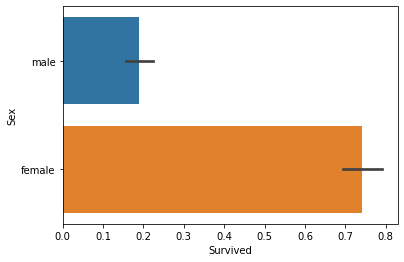

In [22]:
#barplot 수평으로 그리러면?orient='h'
sns.barplot(x='Survived', y='Sex', data= titanic_df , orient='h')

In [ ]:
# 선실 등급별 성별 생존여부를 계산하고, 시각화하라


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

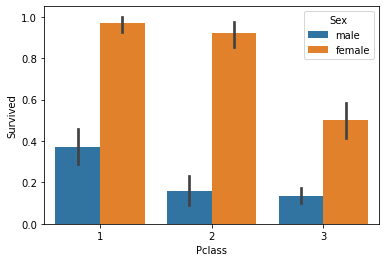

In [24]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df, hue='Sex')

* 나이별 생존 여부

In [32]:
def get_age_cat(x):
    if x<=5:
        cat = 'baby'
    elif x<=12:
        cat = 'child'
    elif x<=18:
        cat = 'teenager'
    elif x<25:
        cat = 'student'
    elif x<=35:
        cat = 'young adult'
    elif x<=60:
        cat = 'adult'
    else:
        cat ='elderly'
    return(cat)

In [33]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(get_age_cat)

TypeError: '<=' not supported between instances of 'method' and 'int'

In [28]:
plt.figure(gifsize(10,6))

order_list = ['baby','teenager','student','young adult','adult','elderly']
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df, order='baby','teenager','student','young adult','adult','elderly')

#sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df, order=order_list)

NameError: name 'gifsize' is not defined

In [ ]:
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [35]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', 'N'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
le.fit(titanic_df.Embarked)
le.transform(titanic_df.Embarked)

array([3, 0, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3,
       2, 3, 3, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0,
       2, 3, 2, 2, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 1, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 0, 3, 3, 0, 3, 2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 2, 3, 0, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0, 0, 2, 3,
       2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 2, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2,
       3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 0,
       3, 3, 3, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 2,

In [ ]:
c = LabelEncoder()
c.fit(titanic_df.Cabin)
c.transform(titanic_df.Cabin)

In [ ]:
def make_encoder(x,y):
    x = LabelEncoder()
    x.fit(titanic_df.y)
    return x.transform(titanic_df.y)


* 문자열 카테고리 피처를 숫자형 카테고리 피처로 전환
- labelEncoder 사용 : 카테고리 값의 유형 수에 따라 0 ~ 숫자값으로 변환

* 지금까지 가공한 피처 내역 정리 및 함수로 만들기


### 머신러닝 알고리즘을 활용하여 타이타닉 생존자 예측
- 결정트리, 로지스틱회귀, 랜덤포레스트 알고리즘

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)
